In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/Vincent2308/Corporate-Bankruptcy/refs/heads/main/data/clean/taiwan/taiwan.csv"

df= pd.read_csv(url)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.390923,0.428314,0.435356,0.601457,0.601457,0.998969,0.796887,0.808809,0.302963,...,0.075475,0.728578,0.009219,0.622879,0.601453,0.833419,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.028902,0.569389,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796630,0.808600,0.302963,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.591105,0.591105,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.591105,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.026205,0.569389,0.035490


In [3]:
df.info()
df['Bankrupt?'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 94 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

### Firm Size

We generate some values usiung the ratios available to try and approximate some values which relate to the size of the firm.

In [4]:
df["size_retained"] = df[" Retained Earnings to Total Assets"]
df["size_working_capital"] = df[" Working Capital to Total Assets"]
df["size_networth"] = df[" Net worth/Assets"]
df["size_current_liab"] = df[" Current Liability to Assets"]
df["size_op"] = df[" Operating Expense Rate"]


df["size_index"]= (df["size_retained"] + df["size_working_capital"] + df["size_networth"] +df["size_current_liab"]+df["size_op"] )
# we add 1.0001 to ensure the log is greater than 0 since that is undefined.
# We decided that 1.0001 was large enough to ensure it was positive to actualyl make a differece
# but not too large so that it would distort our resutls
df["log_size"] = np.log(df["size_index"]+ 1.0001)
 

### Multicolinearity

We remove highly correlated features.

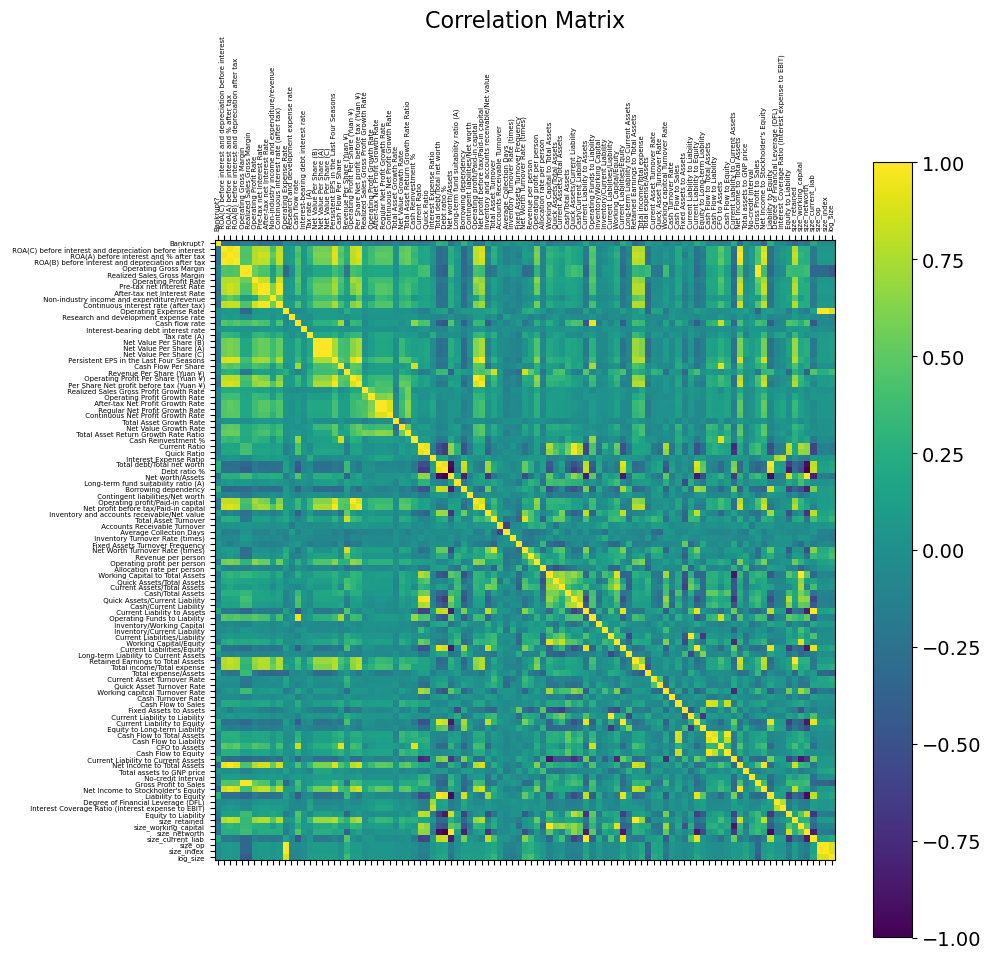

In [5]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=5, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [6]:
def remove_correlated(df, threshold=0.90):
    corr = df.corr().abs()

    # I used GPT for this part
    # it calculates the upper triangle above the diagonal since that has a corr of 1.
    # this avoids us calculating each correlation twice, since the correlation between A&B = corr B&A.
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    drop_cols = [c for c in upper.columns if any(upper[c] > threshold)]
    return df.drop(columns=drop_cols), drop_cols


In [7]:
df_reduced, dropped_columns = remove_correlated(df.drop(columns=["Bankrupt?"]))
df_reduced["Bankrupt?"] = df["Bankrupt?"]

df_reduced.head()


,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Equity to Long-term Liability,Cash Flow to Total Assets,Current Liability to Current Assets,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,log_size,Bankrupt?
0,0.390923,0.601457,0.998969,0.796887,0.302963,1.256969e-04,0.0,0.458143,0.000725,0.0,...,0.126549,0.637555,0.075475,0.009219,0.622879,0.026601,0.564050,0.016469,1.268862,1
1,0.464291,0.610235,0.998946,0.797380,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,...,0.120916,0.641100,0.047775,0.008323,0.623652,0.028902,0.569389,0.020794,1.272104,1
2,0.426071,0.601450,0.998857,0.796630,0.302963,2.361297e-04,25500000.0,0.458521,0.000790,0.0,...,0.117922,0.642765,0.025346,0.040003,0.623841,0.026555,0.563706,0.016474,1.289339,1
3,0.399844,0.591105,0.998700,0.796967,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,...,0.120760,0.579039,0.067250,0.003252,0.622929,0.026697,0.564663,0.023982,1.275395,1
4,0.465022,0.598783,0.998973,0.797366,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,...,0.110933,0.622374,0.047725,0.003878,0.623521,0.026205,0.569389,0.035490,22.788862,1


In [8]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 68 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    Operating Gross Margin                                   6819 non-null   float64
 2    Operating Profit Rate                                    6819 non-null   float64
 3    Pre-tax net Interest Rate                                6819 non-null   float64
 4    Non-industry income and expenditure/revenue              6819 non-null   float64
 5    Operating Expense Rate                                   6819 non-null   float64
 6    Research and development expense rate                    6819 non-null   float64
 7    Cash flow rate                                           6819 non-null   float64
 8    Interest-bearing 

Text(0.5, 1.0, 'Correlation')

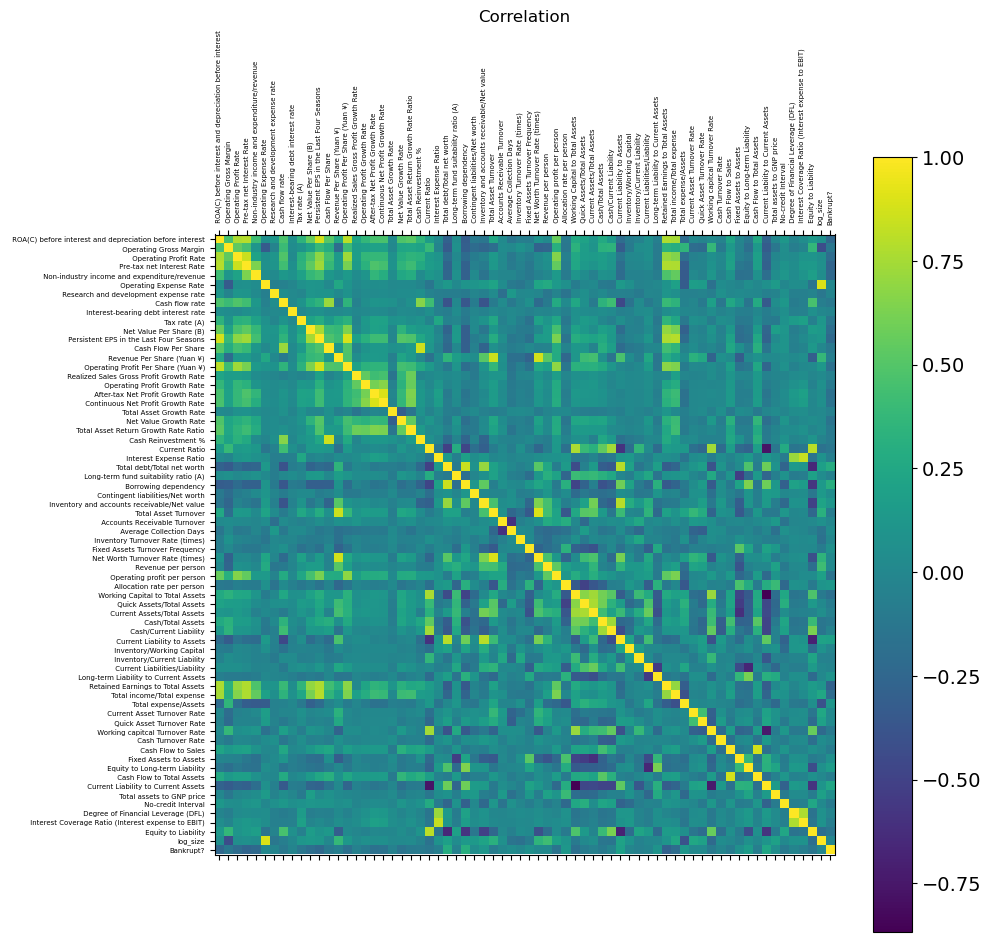

In [9]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df_reduced.corr(), fignum=f.number)
plt.xticks(range(df_reduced.select_dtypes(['number']).shape[1]), df_reduced.select_dtypes(['number']).columns, fontsize=5, rotation=90)
plt.yticks(range(df_reduced.select_dtypes(['number']).shape[1]), df_reduced.select_dtypes(['number']).columns, fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation')

### Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

x = df_reduced.drop(columns=["Bankrupt?"])
y = df_reduced['Bankrupt?']

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2, stratify =y, random_state = 42)

### Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train)
x_test_sc  = scaler.transform(x_test)

### SMOTE

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x_train_sc_sm, y_train_sm, = smote.fit_resample(x_train_sc, y_train)

### X.X Early-Warning Indicators
We could maybe add some more ratios, but they will probably have similar variances.

In [13]:
key_ratios = [" Working Capital to Total Assets"," Cash Flow to Total Assets"," Total debt/Total net worth"," Total Asset Turnover"]
grouped = df_reduced.groupby("Bankrupt?")[key_ratios]


stats = grouped.agg(["mean", "std", "var"])
print(stats)

          Working Capital to Total Assets                      \
                                     mean       std       var   
Bankrupt?                                                       
0                                0.816271  0.054188  0.002936   
1                                0.760626  0.047581  0.002264   

          Cash Flow to Total Assets                      \
                               mean       std       var   
Bankrupt?                                                 
0                          0.650334  0.036983  0.001368   
1                          0.635457  0.024808  0.000615   

          Total debt/Total net worth                     Total Asset Turnover  \
                                mean       std       var                 mean   
Bankrupt?                                                                       
0                           0.006776  0.005266  0.000028             0.139268   
1                           0.015789  0.006547  0.0000

In [15]:
var_df = stats.xs("var", axis=1, level=1)  
var_df.index = var_df.index.map({0: "Healthy", 1: "Bankrupt"})


var_table = var_df.T
var_table.index.name = "Ratio"
var_table.columns.name = None


var_table = var_table.round(3)
print(var_table)

                                 Healthy  Bankrupt
Ratio                                             
Working Capital to Total Assets    0.003     0.002
Cash Flow to Total Assets          0.001     0.001
Total debt/Total net worth         0.000     0.000
Total Asset Turnover               0.007     0.006


In [20]:
mean_df = stats.xs("mean", axis=1, level=1)
std_df  = stats.xs("std", axis=1, level=1)

cv_df = std_df / mean_df
cv_df.index = cv_df.index.map({0: "Healthy", 1: "Bankrupt"})

cv_table = cv_df.T
cv_table.index.name = "Ratio"
cv_table.columns.name = None

cv_table = cv_table.round(3)
print(cv_table)


                                 Healthy  Bankrupt
Ratio                                             
Working Capital to Total Assets    0.066     0.063
Cash Flow to Total Assets          0.057     0.039
Total debt/Total net worth         0.777     0.415
Total Asset Turnover               0.612     0.733


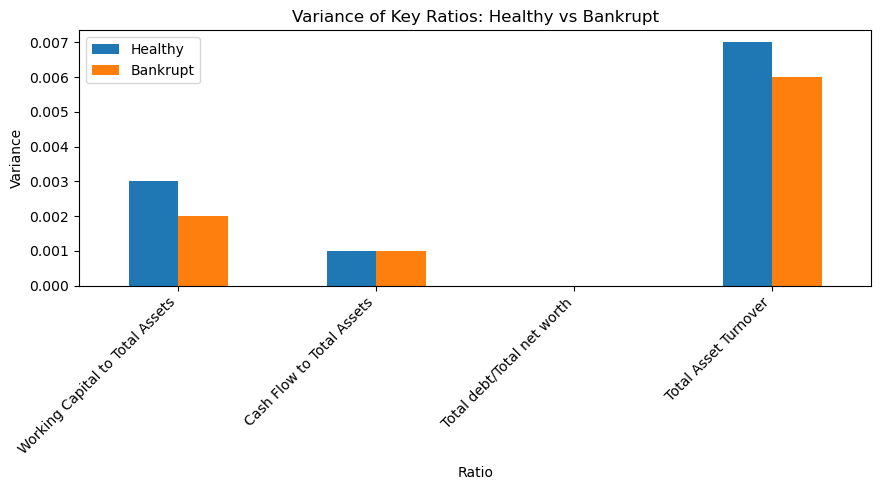

In [ ]:
ax = var_table.plot(kind="bar", figsize=(9, 5))
ax.set_ylabel("Variance")
ax.set_title("Variance of key ratios: Healthy vs Bankrupt")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


/var/folders/_t/2xhkkvpd70v6f_zb6myqk2l40000gn/T/ipykernel_54479/293853281.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["Healthy", "Bankrupt"])


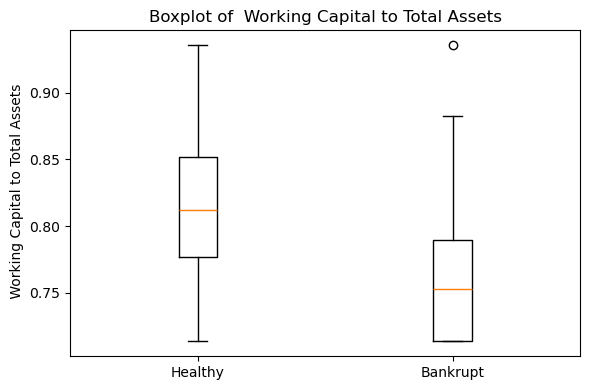

/var/folders/_t/2xhkkvpd70v6f_zb6myqk2l40000gn/T/ipykernel_54479/293853281.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["Healthy", "Bankrupt"])


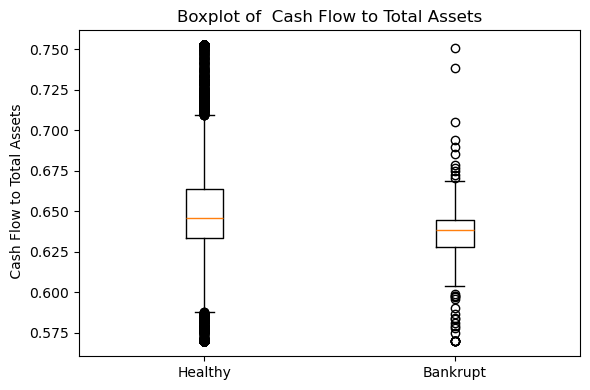

/var/folders/_t/2xhkkvpd70v6f_zb6myqk2l40000gn/T/ipykernel_54479/293853281.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["Healthy", "Bankrupt"])


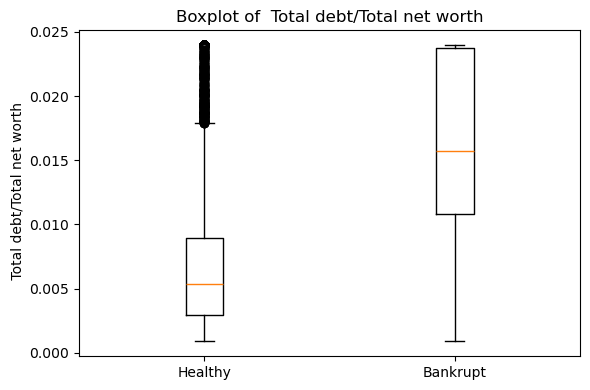

/var/folders/_t/2xhkkvpd70v6f_zb6myqk2l40000gn/T/ipykernel_54479/293853281.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["Healthy", "Bankrupt"])


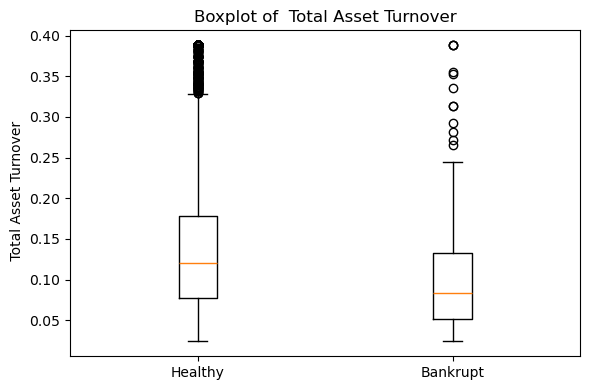

In [24]:
for ratio in key_ratios:
    plt.figure(figsize=(6, 4))
    data = [df.loc[df["Bankrupt?"] == 0, ratio],df.loc[df["Bankrupt?"] == 1, ratio]]
    plt.boxplot(data, labels=["Healthy", "Bankrupt"])
    plt.title(f"Boxplot of {ratio}")
    plt.ylabel(ratio)
    plt.tight_layout()
    plt.show()
